# NLP Spam Prediction

In [ ]:
import pandas as pd
import io

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving spam.csv to spam.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['spam.csv']))
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df["Category"].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

## **Label Encoding**

In [ ]:
df["Category"] = df["Category"].replace({"spam":1,"ham":0})

In [ ]:
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## **Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(df["Message"],df["Category"],train_size=0.8,random_state=13)


In [ ]:
print(X_train.shape)
print(X_test.shape)

(4457,)
(1115,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [ ]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
X_train.toarray()[0]

array([0, 0, 0, ..., 0, 0, 0])

## **Training a classifier**

In [ ]:
# Logistics Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
predictions = logreg.predict(X_test)

In [ ]:
email = ["So, bear with me, I’ve just been trying to make you proud."]

In [ ]:
email_vec = vectorizer.transform(email)

In [ ]:
email_vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
logreg.predict(email_vec)

array([0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       961
           1       0.98      0.89      0.93       154

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
cm = confusion_matrix(y_test,predictions)
cm

array([[958,   3],
       [ 17, 137]])

In [ ]:
import seaborn as sb
from matplotlib import pyplot as plt

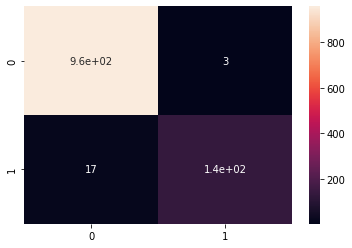

In [ ]:
sb.heatmap(cm,annot=True)

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [ ]:
gaussian_nb = GaussianNB()

In [ ]:
gaussian_nb.fit(X_train.toarray(), y_train)

GaussianNB()

In [ ]:
y_pred = gaussian_nb.predict(X_test.toarray())

In [ ]:
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.9031390134529148

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       961
           1       0.60      0.92      0.72       154

    accuracy                           0.90      1115
   macro avg       0.79      0.91      0.83      1115
weighted avg       0.93      0.90      0.91      1115



In [ ]:
cm_nb = metrics.confusion_matrix(y_test, y_pred)
cm_nb

array([[866,  95],
       [ 13, 141]])

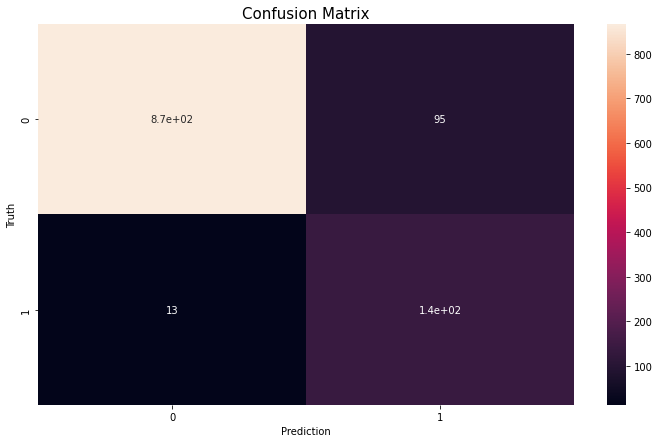

In [ ]:
plt.figure(figsize=(12, 7))
sb.heatmap(cm_nb, annot=True)
plt.title('Confusion Matrix', fontsize=15)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show()